# Ordinary Least Squares [all]
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

linear_model.LinearRegression()

{'copy_X': True,   
 'fit_intercept': True,    
 'n_jobs': None,   
 'normalize': 'deprecated',    
 'positive': False}
 
 **_no hyperparameter tuning_**

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import platform
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize, space
import sys

from validation import cross_validation
from validation import performance_test_shifted

date_format = '%Y-%m-%d'

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
# config 'all', 'vif_5' or 'vif_10'
vif = 'all'

# config model
ml_algorithm = linear_model.LinearRegression
filename = 'single-model_tau_ols'

In [3]:
my_os = platform.system()
print('OS in my system: ',my_os)

if my_os == 'Windows':
    path = str(pathlib.Path().absolute()) + '\\'
    slash = '\\'
else:
    path = str(pathlib.Path().absolute()) + '/'
    slash = '/'

path_3 = path.replace('4_modelling', '3_data_pre-processing')

OS in my system:  Linux


## Load Data

In [4]:
data_set = pd.read_csv(path_3 + 'data_artifacts' + slash + 'data_set_e_spx_3-' + vif + '.csv', index_col=0)

## Original Target Model (no forecast horizon)
### Time Series Cross Validation on Default/Optimal Model
_optimal model = default model_

In [5]:
opt_model_ori = ml_algorithm()
opt_model_ori.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [6]:
opt_model_ori_tscv_scores = cross_validation(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_tscv_scores = pd.DataFrame(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.003729,0.002429,0.047676,0.037289,0.847599,0.920517
1,0.003501,0.003768,0.045609,0.048371,0.869165,0.860113
2,0.003264,0.004776,0.044012,0.055840,0.881119,0.855936
3,0.003414,0.009054,0.045202,0.080590,0.885831,0.655353
4,0.003919,0.007429,0.048724,0.072562,0.868327,0.661222
5,0.004376,0.003253,0.052325,0.045040,0.850314,0.830741
6,0.004337,0.003033,0.052210,0.044434,0.847567,0.873773
7,0.004227,0.002447,0.051463,0.038891,0.851678,0.881135
8,0.003929,0.007735,0.049137,0.071935,0.857055,0.451404
9,0.004361,0.003122,0.052184,0.044600,0.837123,0.833184


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003906,0.004704,0.048854,0.053955,0.859578,0.782338
std,0.000417,0.002451,0.003162,0.015549,0.015875,0.146788
min,0.003264,0.002429,0.044012,0.037289,0.837123,0.451404
25%,0.003558,0.003055,0.046126,0.044476,0.848278,0.703602
50%,0.003924,0.003511,0.048930,0.046706,0.854367,0.844560
75%,0.004309,0.006765,0.052004,0.067911,0.868955,0.870358
max,0.004376,0.009054,0.052325,0.080590,0.885831,0.920517


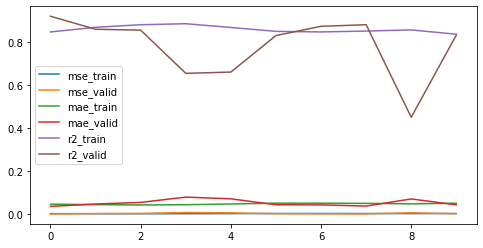

In [7]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

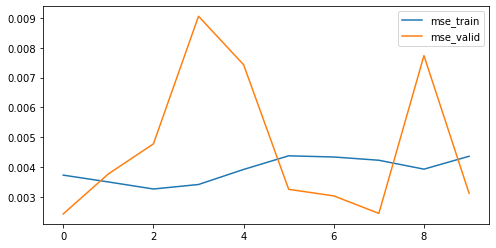

In [8]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

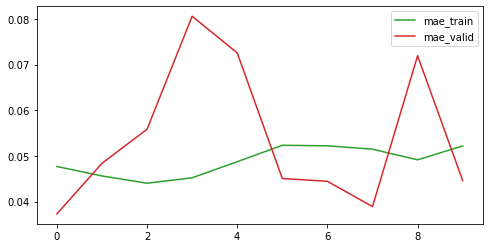

In [9]:
ax = opt_model_ori_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

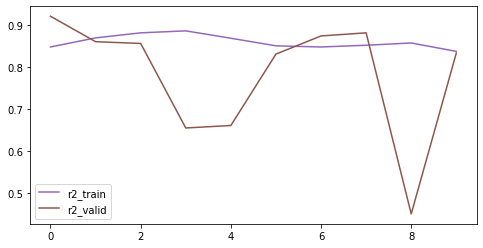

In [10]:
ax = opt_model_ori_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [11]:
opt_model_ori_test_scores = performance_test_shifted(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_test_scores = pd.DataFrame(opt_model_ori_test_scores)
display(opt_model_ori_test_scores)
display(opt_model_ori_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.003535,0.003796,0.046031,0.048635,0.867279,0.859069,0.366445,0.390232
1,0.003507,0.004779,0.045790,0.055914,0.871717,0.855858,0.425448,0.397301
2,0.003435,0.008904,0.045387,0.079816,0.884791,0.661067,0.330819,0.389310
3,0.004046,0.007513,0.049559,0.073239,0.862388,0.657384,0.286654,0.351267
4,0.004280,0.003172,0.051659,0.044382,0.852793,0.834932,0.281294,0.271760
5,0.004195,0.002993,0.051076,0.044126,0.851864,0.875411,0.288558,0.264660
6,0.004110,0.002488,0.050573,0.039162,0.854137,0.879098,0.291026,0.289459
7,0.003979,0.008146,0.049649,0.074163,0.856246,0.422250,0.199579,0.264476
8,0.004292,0.003097,0.051670,0.044316,0.844437,0.834534,0.245124,0.232980
9,0.004195,0.003115,0.050987,0.045334,0.839610,0.850300,0.245513,0.218606


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003957,0.004800,0.049238,0.054909,0.858526,0.772990,0.296046,0.307005
std,0.000336,0.002436,0.002523,0.015079,0.013389,0.148525,0.064764,0.068524
min,0.003435,0.002488,0.045387,0.039162,0.839610,0.422250,0.199579,0.218606
25%,0.003646,0.003102,0.046913,0.044332,0.852097,0.704434,0.254458,0.264522
50%,0.004078,0.003484,0.050111,0.046984,0.855191,0.842616,0.287606,0.280609
75%,0.004195,0.006829,0.051054,0.068908,0.866056,0.858267,0.320871,0.379800
max,0.004292,0.008904,0.051670,0.079816,0.884791,0.879098,0.425448,0.397301


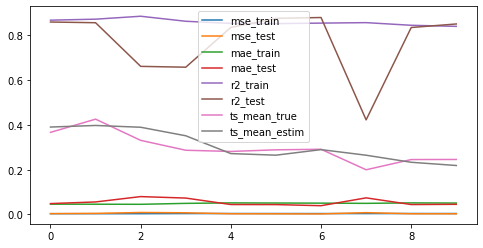

In [12]:
ax = opt_model_ori_test_scores.plot(figsize=(8,4))

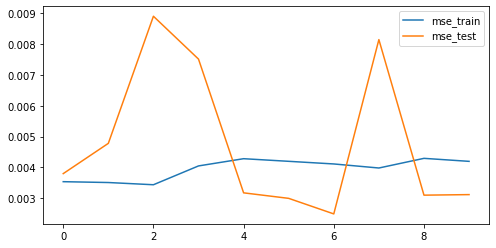

In [13]:
ax = opt_model_ori_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

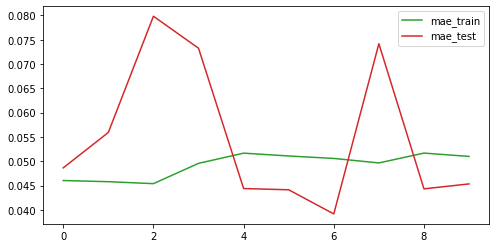

In [14]:
ax = opt_model_ori_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

(0.25, 0.9)

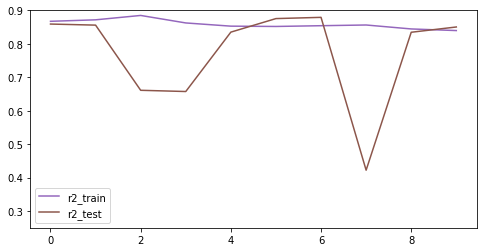

In [15]:
ax = opt_model_ori_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])
plt.ylim([0.25,0.9])

(0.2, 0.45)

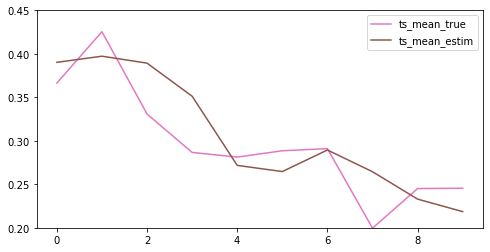

In [16]:
ax = opt_model_ori_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [17]:
results_ori = {'Model': [opt_model_ori],
            'fc_horizon': 0,
            'vif': [vif],
            'mse_tscv_t': [opt_model_ori_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_ori_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_ori_test_scores.mse_train.mean()],
            'mse_test': [opt_model_ori_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_ori_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_ori_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_ori_test_scores.mae_train.mean()],
            'mae_test': [opt_model_ori_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_ori_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_ori_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_ori_test_scores.r2_train.mean()],
            'r2_test': [opt_model_ori_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_ori.get_params()],
            'ts_mean_true': opt_model_ori_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_ori_test_scores.ts_mean_estim.mean(),
              }

## ----------------------------------------------------------
## Predicted Target Model (one year forecast horizon)
### Time Series Cross Validation on Default Model

In [18]:
opt_model_hor = ml_algorithm()
opt_model_hor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [19]:
opt_model_hor_tscv_scores = cross_validation(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_tscv_scores = pd.DataFrame(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.007775,0.006059,0.070893,0.059246,0.700903,0.777363
1,0.007273,0.009326,0.067921,0.077777,0.729142,0.720274
2,0.007554,0.016482,0.068946,0.107011,0.743687,0.357995
3,0.008616,0.013291,0.074232,0.099000,0.706955,0.382970
4,0.009029,0.009490,0.076523,0.080372,0.687332,0.502754
5,0.009004,0.006073,0.076268,0.062969,0.680372,0.742926
6,0.008750,0.005686,0.075212,0.059837,0.689095,0.714285
7,0.007960,0.014904,0.071188,0.101542,0.704868,-0.077645
8,0.008065,0.005688,0.071217,0.060528,0.694320,0.694651
9,0.007660,0.005061,0.068571,0.056565,0.695230,0.754692


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008168,0.009206,0.072097,0.076485,0.703190,0.557027
std,0.000635,0.004267,0.003234,0.019697,0.019575,0.272471
min,0.007273,0.005061,0.067921,0.056565,0.680372,-0.077645
25%,0.007689,0.005781,0.069433,0.060010,0.690401,0.412916
50%,0.008012,0.007700,0.071203,0.070373,0.698066,0.704468
75%,0.008717,0.012341,0.074967,0.094343,0.706434,0.737263
max,0.009029,0.016482,0.076523,0.107011,0.743687,0.777363


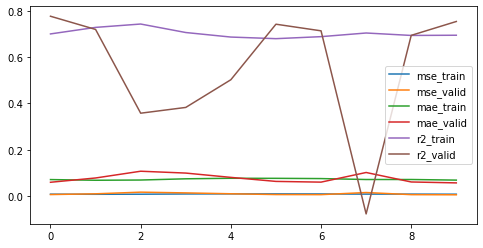

In [20]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

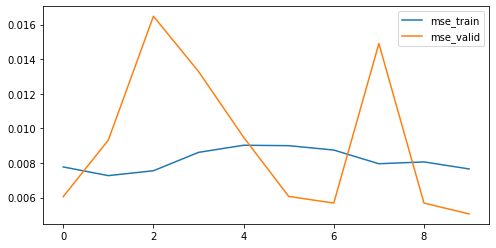

In [21]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

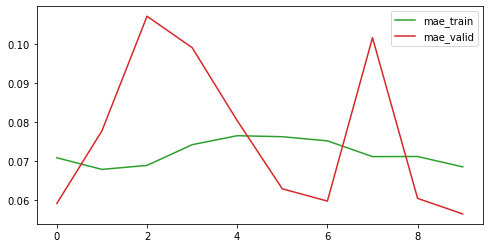

In [22]:
ax = opt_model_hor_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

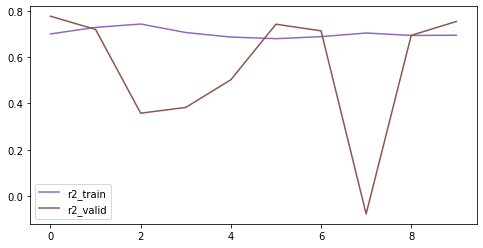

In [23]:
ax = opt_model_hor_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [24]:
opt_model_hor_test_scores = performance_test_shifted(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_test_scores = pd.DataFrame(opt_model_hor_test_scores)
display(opt_model_hor_test_scores)
display(opt_model_hor_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.007509,0.009458,0.069226,0.078693,0.718506,0.716322,0.429797,0.390599
1,0.007494,0.016279,0.068755,0.106211,0.744674,0.365906,0.335499,0.418053
2,0.008443,0.013406,0.073583,0.099574,0.708108,0.377616,0.293080,0.385801
3,0.008969,0.009421,0.076410,0.079966,0.686977,0.506347,0.287144,0.353548
4,0.008952,0.005802,0.076111,0.061550,0.679769,0.754402,0.295090,0.292412
5,0.008550,0.005710,0.074227,0.059806,0.693064,0.713068,0.292463,0.287063
6,0.008281,0.016777,0.072892,0.108191,0.696435,-0.213075,0.205042,0.307255
7,0.008601,0.006035,0.074085,0.062320,0.682173,0.676025,0.247086,0.262787
8,0.007740,0.004989,0.069676,0.055752,0.699951,0.758176,0.248710,0.240950
9,0.007330,0.018764,0.067079,0.119395,0.704287,-0.005870,0.342639,0.230282


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008187,0.010664,0.072204,0.083146,0.701394,0.464892,0.297655,0.316875
std,0.000619,0.005237,0.003273,0.023495,0.019323,0.339870,0.062015,0.066279
min,0.007330,0.004989,0.067079,0.055752,0.679769,-0.213075,0.205042,0.230282
25%,0.007566,0.005860,0.069339,0.061742,0.688499,0.368834,0.258318,0.268856
50%,0.008362,0.009440,0.073238,0.079329,0.698193,0.591186,0.292772,0.299834
75%,0.008588,0.015561,0.074191,0.104552,0.707153,0.715508,0.325397,0.377738
max,0.008969,0.018764,0.076410,0.119395,0.744674,0.758176,0.429797,0.418053


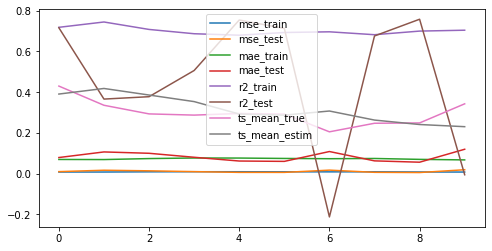

In [25]:
ax = opt_model_hor_test_scores.plot(figsize=(8,4))

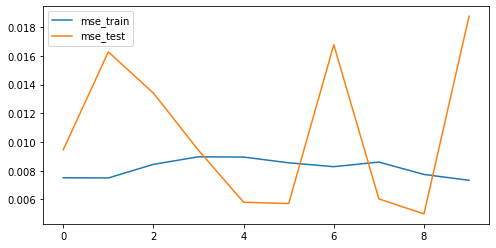

In [26]:
ax = opt_model_hor_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

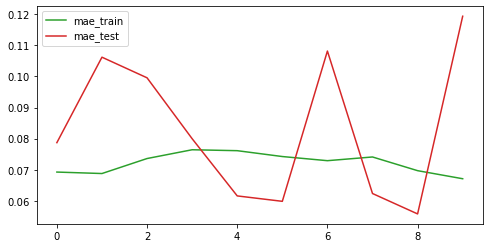

In [27]:
ax = opt_model_hor_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

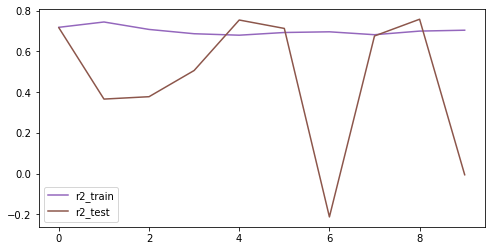

In [28]:
ax = opt_model_hor_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

(0.2, 0.45)

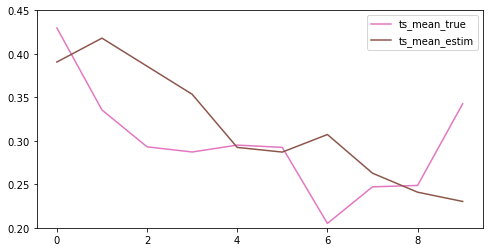

In [29]:
ax = opt_model_hor_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [30]:
results_hor = {'Model': [opt_model_ori],
            'fc_horizon': 1,
            'vif': [vif],
            'mse_tscv_t': [opt_model_hor_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_hor_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_hor_test_scores.mse_train.mean()],
            'mse_test': [opt_model_hor_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_hor_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_hor_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_hor_test_scores.mae_train.mean()],
            'mae_test': [opt_model_hor_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_hor_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_hor_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_hor_test_scores.r2_train.mean()],
            'r2_test': [opt_model_hor_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_hor.get_params()],
            'ts_mean_true': opt_model_hor_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_hor_test_scores.ts_mean_estim.mean(),
              }

## Safe to Excel

In [31]:
results = pd.concat([pd.DataFrame(results_ori), pd.DataFrame(results_hor)])

display(results)

storage_name = filename + '_' + vif + '_' + str(datetime.today().day) + '.xlsx'

pd.DataFrame(results).to_excel(path + 'artifacts' + slash + storage_name, index=None)

,Model,fc_horizon,vif,mse_tscv_t,mse_tscv_v,mse_train,mse_test,mae_tscv_t,mae_tscv_v,mae_train,mae_test,r2_tscv_t,r2_tscv_v,r2_train,r2_test,opt_model,ts_mean_true,ts_mean_estim
0,LinearRegression(),0,all,0.003906,0.004704,0.003957,0.004800,0.048854,0.053955,0.049238,0.054909,0.859578,0.782338,0.858526,0.772990,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.296046,0.307005
0,LinearRegression(),1,all,0.008168,0.009206,0.008187,0.010664,0.072097,0.076485,0.072204,0.083146,0.703190,0.557027,0.701394,0.464892,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.297655,0.316875
